# SVC on Mushroom Classification Dataset

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
data = pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#see the shape of the dataset
data.shape

(8124, 23)

In [4]:
#to see the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# observation

All of the features are categorical features, there is no numerical feature present in the 
dataset.

Class is the target feature.

In [5]:
#checking the null values 
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# observation

There is no null values present in any of these features.

In [6]:
#stripping the feature names
data.columns = [feature.strip() for feature in data.columns]

In [7]:
#splitting the variables into x and y
#independent variables as x
x = data.drop('class', axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [8]:
#creating target variable as y
y = data['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

# univariate analysis

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


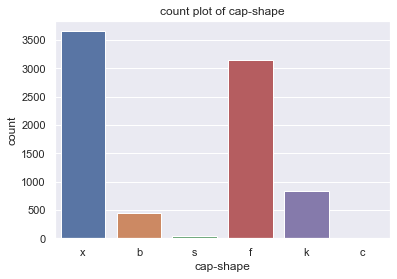

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


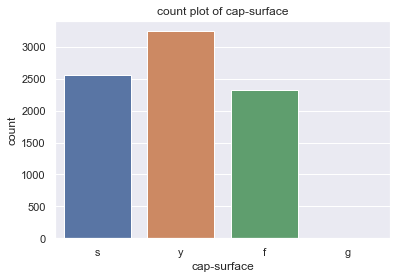

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


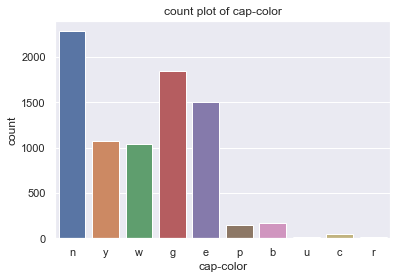

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


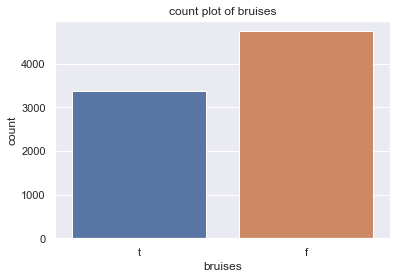

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


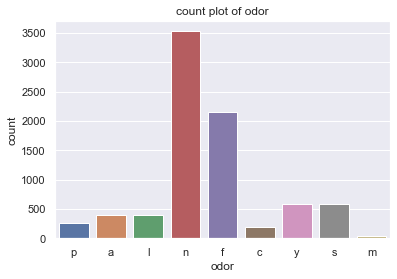

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


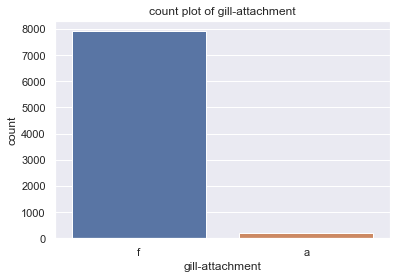

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


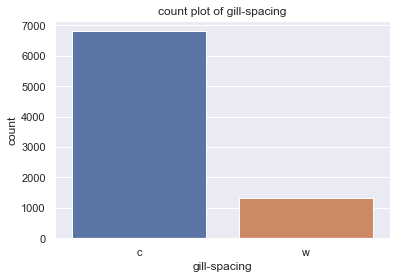

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


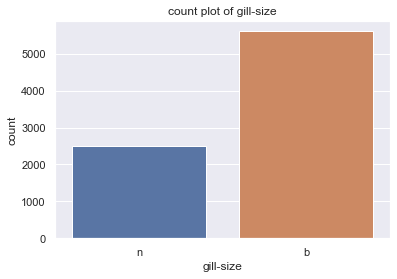

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


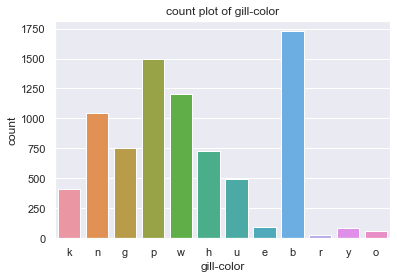

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


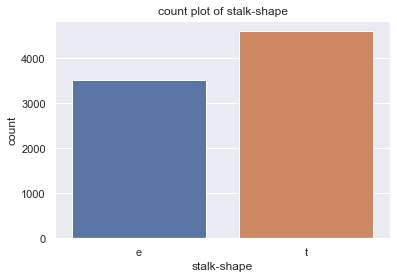

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


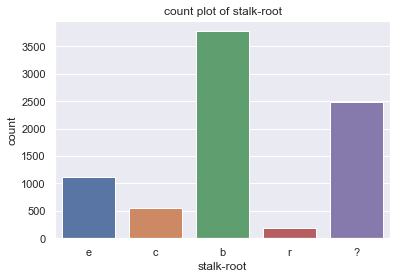

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


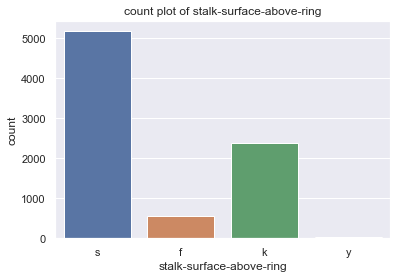

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


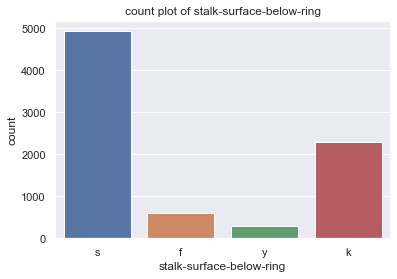

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


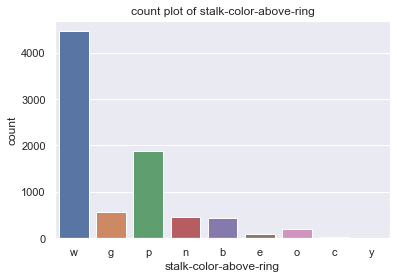

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


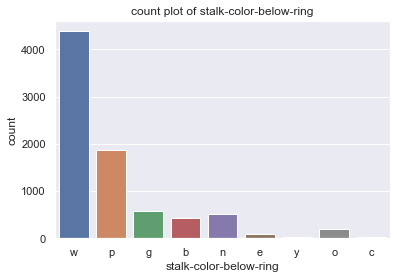

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


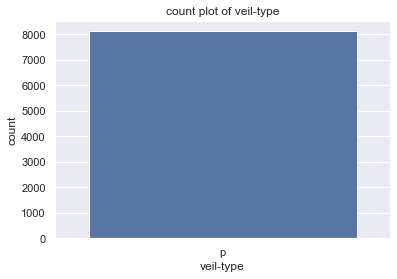

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


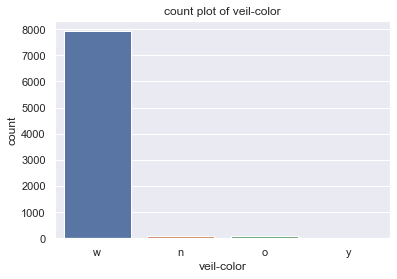

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


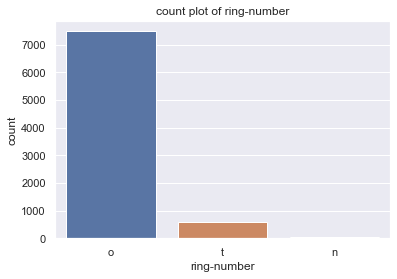

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


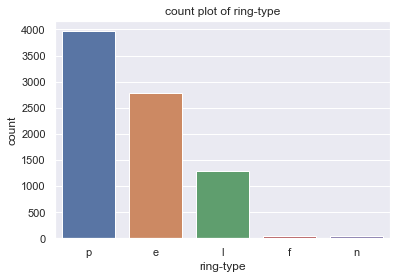

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


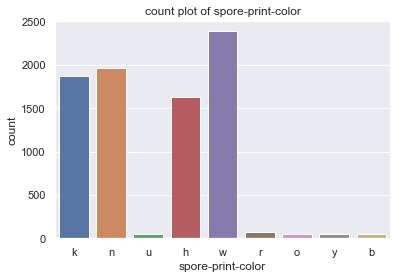

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


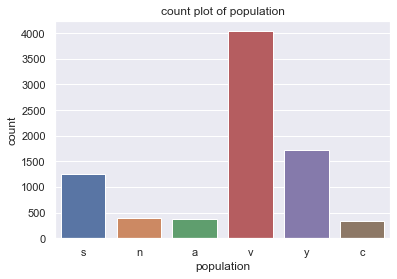

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


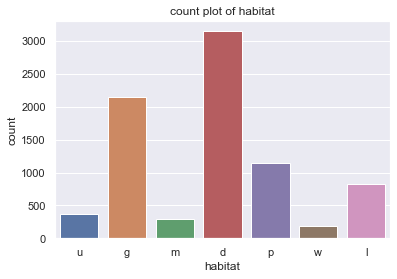

In [9]:
#count plot of all the independent features 
for feature in x.columns:
    sns.set_theme()
    sns.countplot(data[feature])
    plt.title('count plot of {}'.format(feature))
    plt.show()

# observation

1. most of the mushrooms have cap shape of x and f
2. mushrooms with cap surface y is high followed by s and f
3. most of the mushrooms with cap color n 
4. bruises feature is balanced with t and f
5. mushrooms mostly have n and f odor
6. gill attachment has data imbalanced with f category has large in number 
7. gill spacing has also data imbalance
8. gill size has a biased with b in large numbers
9. b has highest gill color
10. stalk shape is balanced
11. b has highest stalk root
12. s has highest stalk surface above ring
12. d has highest habitat

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

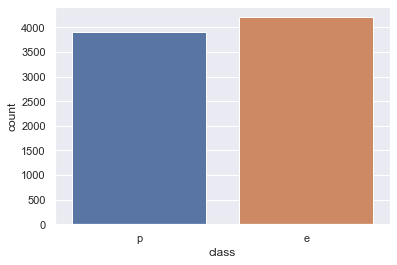

In [10]:
#checking data balance and imbalance of target feature
sns.countplot(data['class'])

# observation

The target feature has data balanced in both p and e classes. so, there is no biaseness in fixing the 
model

# Bi-variate analysis

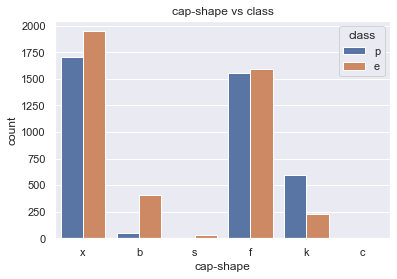

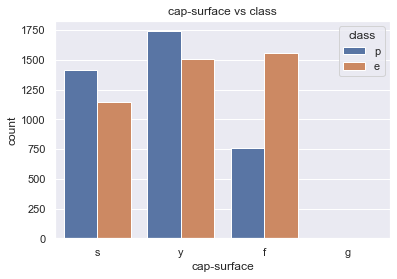

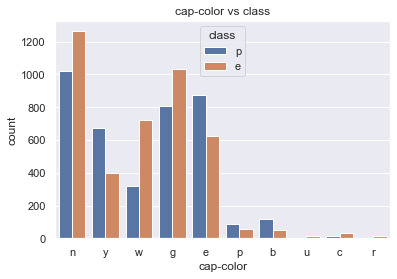

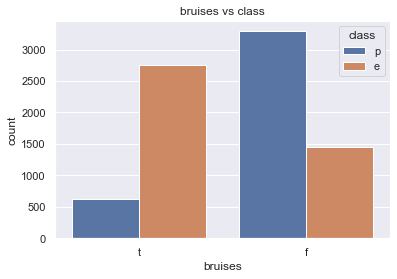

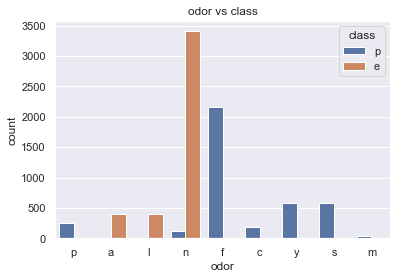

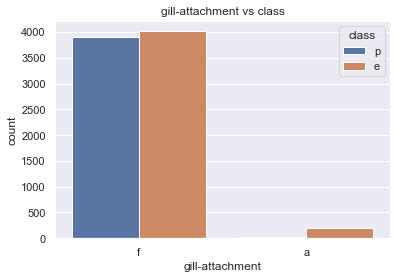

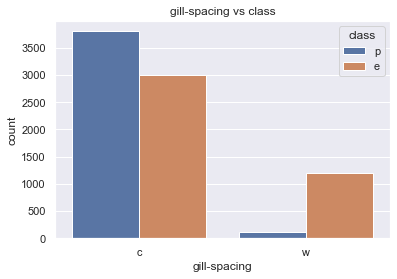

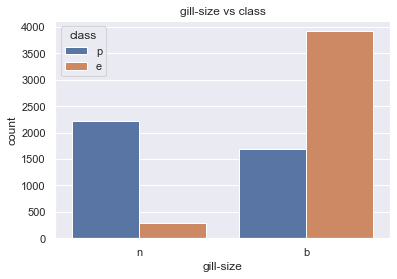

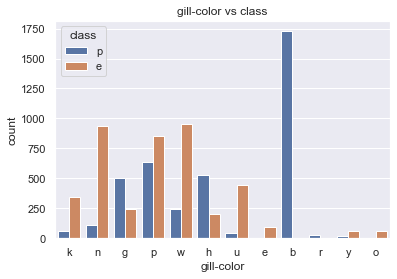

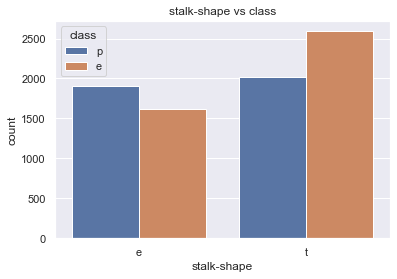

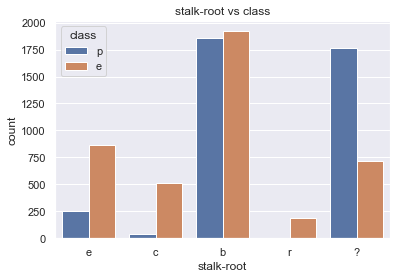

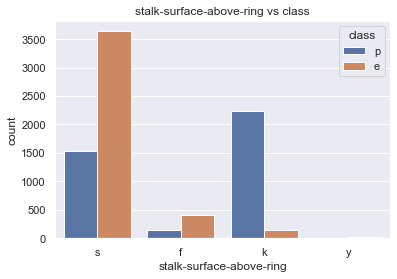

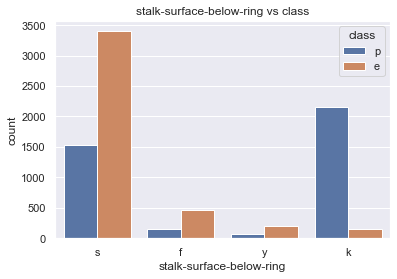

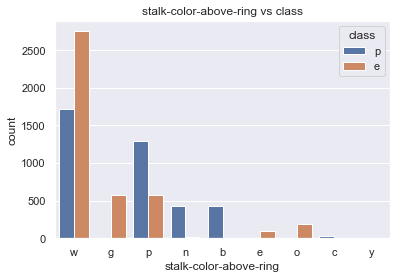

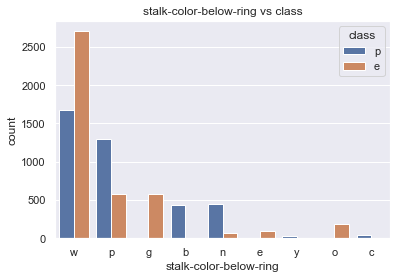

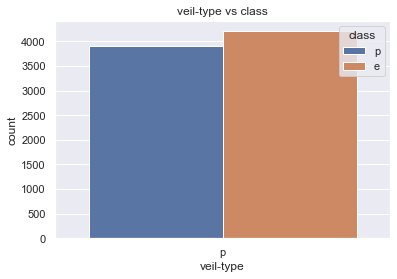

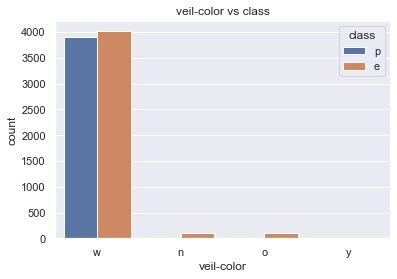

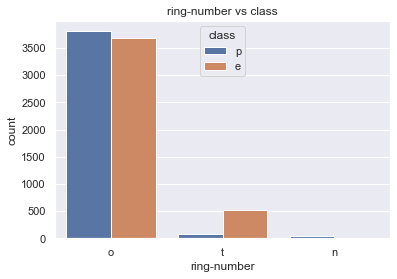

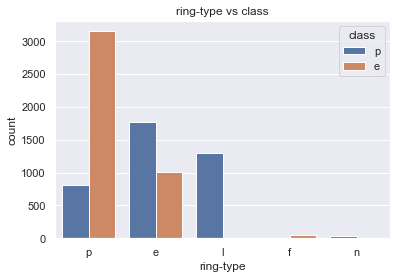

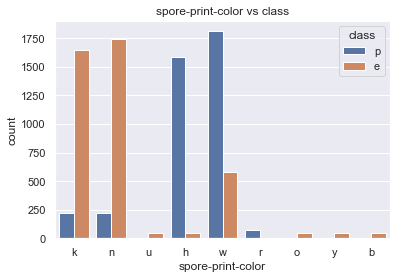

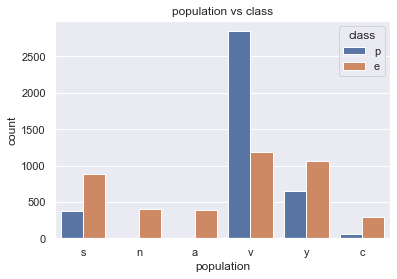

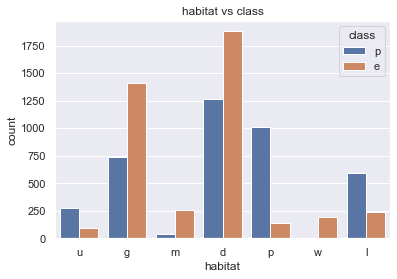

In [11]:
#comparing independent features with dependent feature
for feature in x.columns:
    sns.countplot(x=data[feature], hue=data['class'])
    plt.title('{} vs class'.format(feature))
    plt.show()

In [12]:
#mushrooms with highest population
data['population'].value_counts(ascending=False)

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

Text(0.5, 1.0, 'population from large to small')

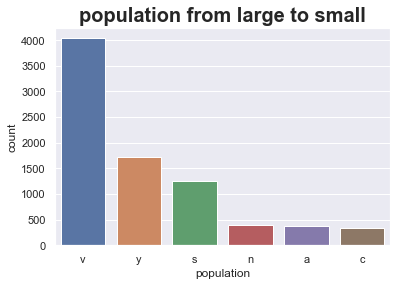

In [13]:
#visualizing the top population of mushrooms
sns.countplot(x=data['population'], order=data['population'].value_counts(ascending=False).index)
plt.title('population from large to small', fontsize=20, fontweight='bold')

In [14]:
#importing ordinal and one hot encoding for data conversion
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [15]:
#converting the categories of independent variables by applying ordinal encoder
for feature in x.columns:
    ordinal = OrdinalEncoder()
    x[feature] = ordinal.fit_transform(x[feature].array.reshape(-1,1))

In [16]:
#transforming the categories present in the dependent column by using one hot encoding
ohe = OneHotEncoder(sparse=False, drop='first')
y = ohe.fit_transform(data['class'].array.reshape(-1,1))

In [17]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [18]:
y

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [19]:
#scaling the dataset using min max scalar
#importing minmax scalar
from sklearn.preprocessing import MinMaxScaler

In [20]:
#creating the object for minmax
minmax = MinMaxScaler()

In [21]:
#Rescaling the features
for feature in x.columns:
    x[feature] = minmax.fit_transform(x[feature].array.reshape(-1,1))

In [22]:
#importing train and test split
from sklearn.model_selection import train_test_split

In [23]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [24]:
#shape of the train and test datasets
print ('shape of x_train:', x_train.shape, '\nshape of x_test:', x_test.shape, 
       '\nshape of y_train:', y_train.shape, '\nshape of y_test:', y_test.shape)

shape of x_train: (6499, 22) 
shape of x_test: (1625, 22) 
shape of y_train: (6499, 1) 
shape of y_test: (1625, 1)


# Model fitting SVC

In [25]:
#importing svc library from sklearn
from sklearn.svm import SVC

In [26]:
#creating object for svc
svc = SVC()

In [27]:
#fitting the model by passing training dataset
svc.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
#intercept of the model
svc.intercept_

array([-0.56264536])

# Performance Metrics

In [29]:
#importing necessary libraries to measure the performance of the model
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score

In [30]:
#predicting the classes by passing test dataset
y_pred = svc.predict(x_test)

In [31]:
#accuracy score of the model
accuracy_score(y_test, y_pred)

1.0

In [32]:
#precison score
precision_score(y_test, y_pred)

1.0

In [33]:
#recall score of the model
recall_score(y_test, y_pred)

1.0

In [34]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[879,   0],
       [  0, 746]], dtype=int64)

In [35]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


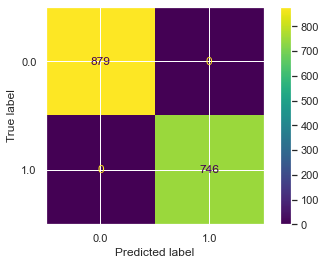

In [36]:
plot_confusion_matrix(svc, x_test, y_test)

In [37]:
#classification report of the model
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       879
         1.0       1.00      1.00      1.00       746

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [38]:
#roc auc score of the model
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve

In [39]:
#roc and auc score of the model
roc_auc_score(y_test, y_pred)

1.0

In [40]:
#calculating roc curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True postive rate')

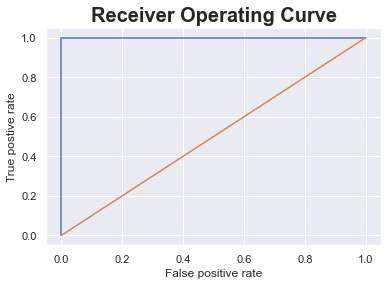

In [41]:
#drawing the roc curve of the model
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.title('Receiver Operating Curve', fontsize=20, fontweight='bold')
plt.xlabel('False positive rate')
plt.ylabel('True postive rate')

# observation

This model is giving 100 percent accuracy, lets perform hyperparameter tuning to correct it.

# Model fitting

In [42]:
#importing gridsearch to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [43]:
#parameters for performing hyperparameter tuning
parameter = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'C': [1,10],
             'gamma': ['scale', 'auto'],
            }

In [44]:
#object for grid search cv
grid = GridSearchCV(SVC(), param_grid=parameter)

In [45]:
#fitting the model on traing dataset
grid.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [46]:
#finding the best parameter
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

# Performance Evaluation

In [47]:
#predicting the model
grid_pred = grid.predict(x_test)

In [48]:
#accuracy score after performing hyper parameter tuning
accuracy_score(y_test, grid_pred)

1.0

In [49]:
#classification report after hypertuning
print (classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       879
         1.0       1.00      1.00      1.00       746

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [50]:
#confusion matrix
confusion_matrix(y_test, grid_pred)

array([[879,   0],
       [  0, 746]], dtype=int64)

In [51]:
#roc and auc score
roc_auc_score(y_test, grid_pred)

1.0

In [52]:
#roc curve
fpr, tpr, threshold = roc_curve(y_test, grid_pred)

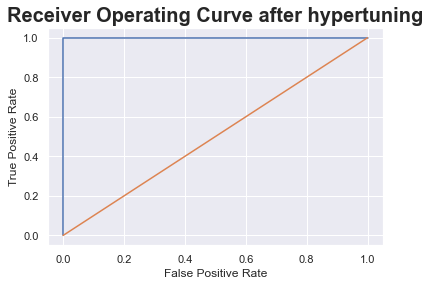

In [53]:
#plotting the roc curve 
plt.title('Receiver Operating Curve after hypertuning', fontsize=20, fontweight='bold')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()